![student studying](https://images.unsplash.com/photo-1434030216411-0b793f4b4173?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80)

Photo by [Green Chameleon](https://unsplash.com/@craftedbygc?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText) on [Unsplash](https://unsplash.com/s/photos/study?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText)
# Modélisation des résultats aux examens de 3ème trimestre
---
## Correction des données
Lors de l'exploration des données, nous avons identifié que plusieurs étudiants avaient des âges incohérents, égaux à 0 ou bien trop élevés (> 80 ans).

Nous devons donc corriger ces valeurs avant de demander à un algorithme de construire un modèle de prédiction. En effet, s'il prend en compte des valeurs erronées, sa précision sera impactée et diminuée.

---

## Import du jeu de données

Comme précédemment, nous importons la librairie Pandas et le jeu de données initial :

```
import pandas as pd

df = pd.read_csv("./student-1-start.csv")
df
```

In [1]:
# Insère ton code ci-dessous et exécute la cellule
import pandas as pd

df = pd.read_csv("./student-1-start.csv")
df

,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,A,4,4,2,2,0,yes,no,...,4,3,4,1,1,3,6,5,6,6
1,F,17,T,1,1,1,2,0,no,yes,...,5,3,3,1,1,3,4,5,5,6
2,F,15,T,1,1,1,2,3,yes,no,...,4,3,2,2,3,3,10,7,8,10
3,F,15,T,4,2,1,3,0,no,yes,...,3,2,2,1,1,5,2,15,14,15
4,F,16,T,3,3,1,2,0,no,yes,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,A,2,2,1,2,2,no,yes,...,5,5,4,4,5,4,11,9,9,9
391,M,17,T,3,1,2,1,0,no,no,...,2,4,5,3,4,2,3,14,16,16
392,M,21,T,1,1,1,1,3,no,no,...,5,5,3,3,3,3,3,10,8,7
393,M,18,T,3,2,3,1,0,no,no,...,4,4,1,3,4,5,0,11,12,10


## Correction de la colonne âge
Tout d'abord, nous pouvons évaluer combien de valeurs semblent incohérentes. Nous allons utiliser la fonction "value_counts" qui va nous renvoyer le nombre d'occurrences dans une colonne.


```
df["age"].value_counts()
```

In [2]:
# Insère ton code ci-dessous et exécute la cellule
df["age"].value_counts()

16    101
17     94
15     81
18     78
19     23
0      12
20      3
22      1
80      1
21      1
Name: age, dtype: int64

Nous pouvons voir que l'âge le plus commun au sein de la colonne et "16 ans" avec 98 occurrences, suivi de 17 et 15 ans.

Nous remarquons alors 2 incohérences :
* 12 étudiants ont un âge à 0
* 1 étudiant est supposément âgé de 80 ans

Nous devons donc corriger ces 2 valeurs.

**Question : Quelle(s) valeur(s) te semblerai(en)t appropriée(s) pour remplacer ces âges erronés ?**

Lorsque tu penses avoir trouvé une solution, valide-la avec ton référent avant de passer à la suite.

---

## Imputation de données

Avant de te lancer dans la correction de données, il faut que tu puisses maitriser la sélection de données dans Pandas. Clique sur le lien ci-dessous qui t'expliquera tout cela avec un exemple simple :

[Tutorial Sélection de Données via Pandas](./student-notebook-2-pandas-data-selection.ipynb)

---

Maintenant que tu maitrises la sélection de données, cherche à afficher les lignes où l'âge des étudiants est égal à 0 :

In [3]:
# Insère ton code ci-dessous et exécute la cellule
df.loc[df["age"] == 0]

,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
19,M,0,T,4,3,1,1,0,no,no,...,3,1,3,1,3,5,4,8,10,10
30,M,0,T,4,4,1,2,0,no,yes,...,5,4,2,3,4,5,0,9,11,12
63,F,0,T,4,3,1,3,0,yes,yes,...,3,4,4,2,4,4,2,10,9,9
70,M,0,T,3,1,2,4,0,no,yes,...,4,3,2,1,1,5,0,13,15,15
229,F,0,A,2,1,2,3,0,no,no,...,3,2,3,1,2,3,10,12,10,12
232,M,0,T,4,4,1,2,0,yes,yes,...,4,5,5,1,3,2,14,11,9,9
252,M,0,T,2,1,1,1,1,no,no,...,3,2,5,2,5,5,4,6,9,8
260,F,0,T,4,3,1,2,0,no,yes,...,3,1,2,1,3,2,21,17,18,18
308,M,0,T,3,3,1,2,1,no,no,...,4,5,3,1,2,5,0,15,12,12
339,F,0,A,3,2,1,2,0,no,yes,...,4,3,3,2,3,2,4,9,10,10


Normalement, tu dois trouver 12 lignes dans ton tableau !

Maintenant que tu sais sélectionner les lignes erronées, il faut que tu inscrives le code pour changer leur valeur. Comme c'est une opération compliquée, fais vérifier ton code par ton référent avant de l'exécuter.

Rappel de la syntaxe :

```
df.loc[condition, colonne à mettre à jour] = valeur corrigée
```



In [4]:
# Insère ton code ci-dessous et exécute la cellule
df.loc[df["age"] == 0, "age"] = 16

Tu peux à nouveau utiliser la fonction "value_counts" pour vérifier que les âges égaux à 0 ont bien disparu :

```
df["age"].value_counts()
```

In [5]:
# Insère ton code ci-dessous et exécute la cellule
df["age"].value_counts()

16    113
17     94
15     81
18     78
19     23
20      3
22      1
80      1
21      1
Name: age, dtype: int64

Maintenant, tu peux répéter la même opération pour corriger les âges égaux à 80 ans !

In [6]:
# Cellule 1 - Pour vérifier que tu arrives bien à sélectionner les lignes
# Insère ton code ci-dessous et exécute la cellule
df.loc[df["age"] == 80]

,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
292,F,80,T,2,1,1,2,1,no,no,...,5,4,3,1,1,5,12,12,12,13


In [7]:
# Cellule 2 - Pour corriger les valeurs
# Insère ton code ci-dessous et exécute la cellule
df.loc[df["age"] == 80, "age"] = 16

In [8]:
# Cellule 3 - Pour vérifier que les valeurs erronées ont bien disparu
# Insère ton code ci-dessous et exécute la cellule
df["age"].value_counts()

16    114
17     94
15     81
18     78
19     23
20      3
22      1
21      1
Name: age, dtype: int64

Nous pouvons même tracer à nouveau l'histogramme pour vérifier que la distribution des âges nous semble plus "logique". Tu peux directement exécuter le code de la cellule ci-dessous.

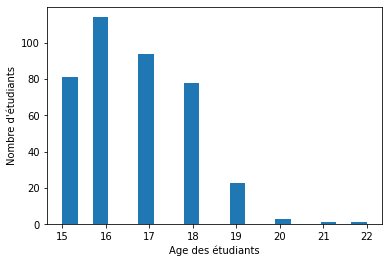

In [9]:
# Cellule à exécuter
import matplotlib.pyplot as plt
plt.hist(df["age"], bins=20)
plt.xlabel("Age des étudiants")  
plt.ylabel("Nombre d'étudiants");

Avant de fermer ce notebook, enregistrons le jeu de données corrigé sur le disque. Pour cela, nous allons utiliser la fonction "to_csv" de Pandas :

```
df.to_csv("./student-2-corrected.csv", index=False)
```

*Note : grâce à la commande "index=False", nous indiquons à Pandas que nous ne souhaitons pas enregistrer les numéros de lignes (= index).*

In [10]:
# Insère ton code ci-dessous et exécute la cellule
df.to_csv("./student-2-corrected.csv", index=False)

Si tu regardes sur le disque, tu dois voir un nouveau fichier "student-corrected.csv" qui est apparu !

---

Si tu es arrivé(e) jusqu'ici, félicitations 🙌
Tu as corrigé les valeurs erronées dans le jeu de données ! Il nous reste encore quelques modifications et nous pourrons entrainer le modèle !

[En route pour le notebook suivant !](./student-notebook-3-transform.ipynb)